In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rc('xtick',c='w')
plt.rc('ytick',c='w')
import numpy as np
from lmfit import Parameters, minimize, report_fit, Model,fit_report
from PyAstronomy import pyasl
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.coordinates import ICRS
from specutils import Spectrum1D, SpectralRegion
from specutils.analysis import snr_derived
from scipy.stats import norm

In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def gaussian(x, amp, cen, wid, off):
    return (amp * np.exp(-(x-cen)**2 / wid))+off

def fill_zeros_with_last(arr):
    prev = np.arange(len(arr))
    prev[arr == 0] = 0
    prev = np.maximum.accumulate(prev)
    return arr[prev]

In [3]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0043B.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
    hdr = hdul[1].header
    print(repr(hdr))
    
    hdr = hdul[0].header
    print(repr(hdr))

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.10           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               408110 /Number of bytes per row                         
NAXIS2  =                   20 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   36 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [4]:
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])

(0, 3000)

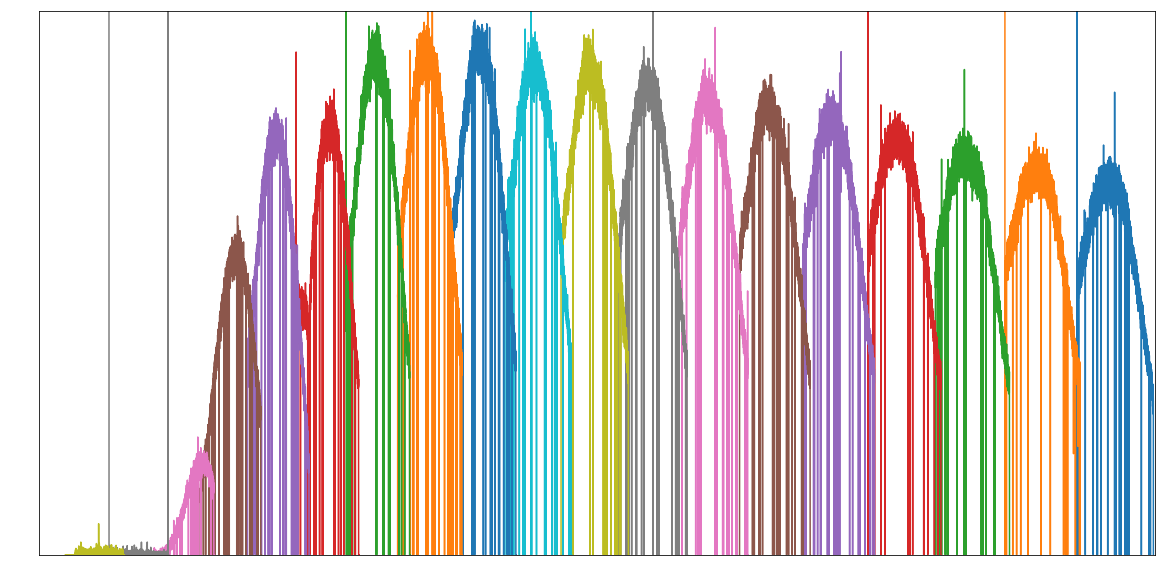

In [5]:
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    count = count +1
plt.xlim(4500,6000)
plt.ylim(0,3000)

(1500, 3000)

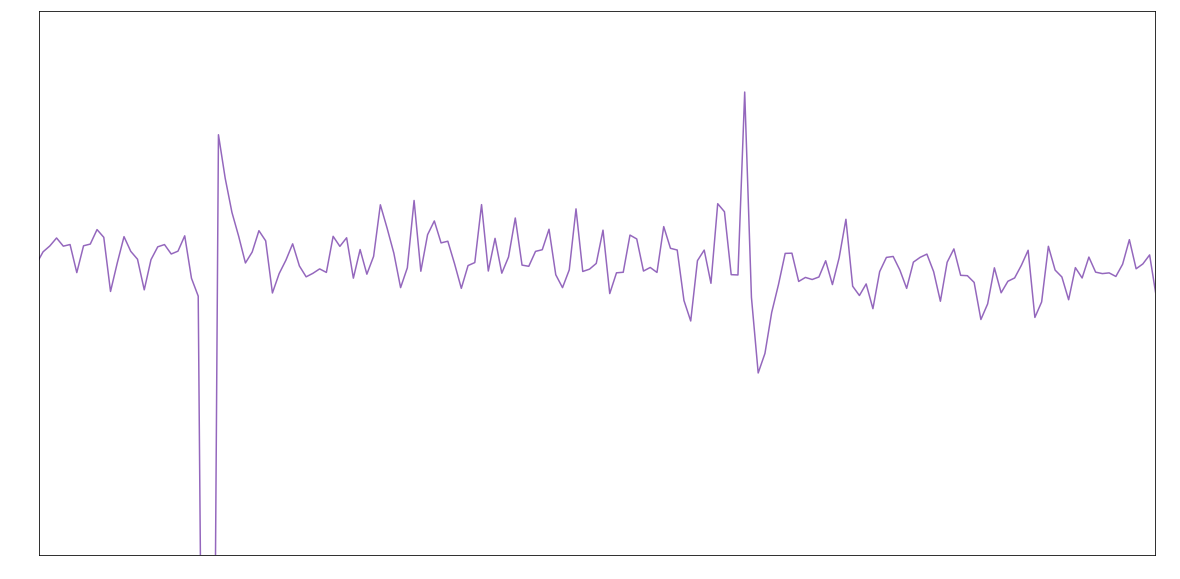

In [8]:
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    count = count +1
plt.xlim(5575,5579)
plt.ylim(1500,3000)

In [9]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0044B.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])

(0, 3000)

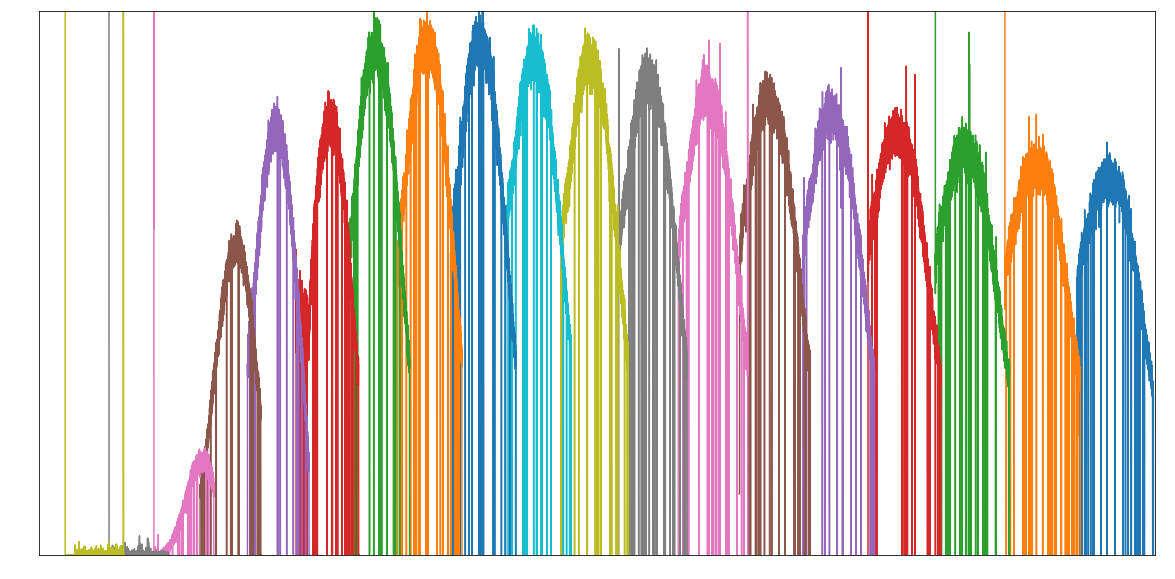

In [11]:
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    count = count +1
plt.xlim(4500,6000)
plt.ylim(0,3000)

In [3]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0043G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])

(0, 3000)

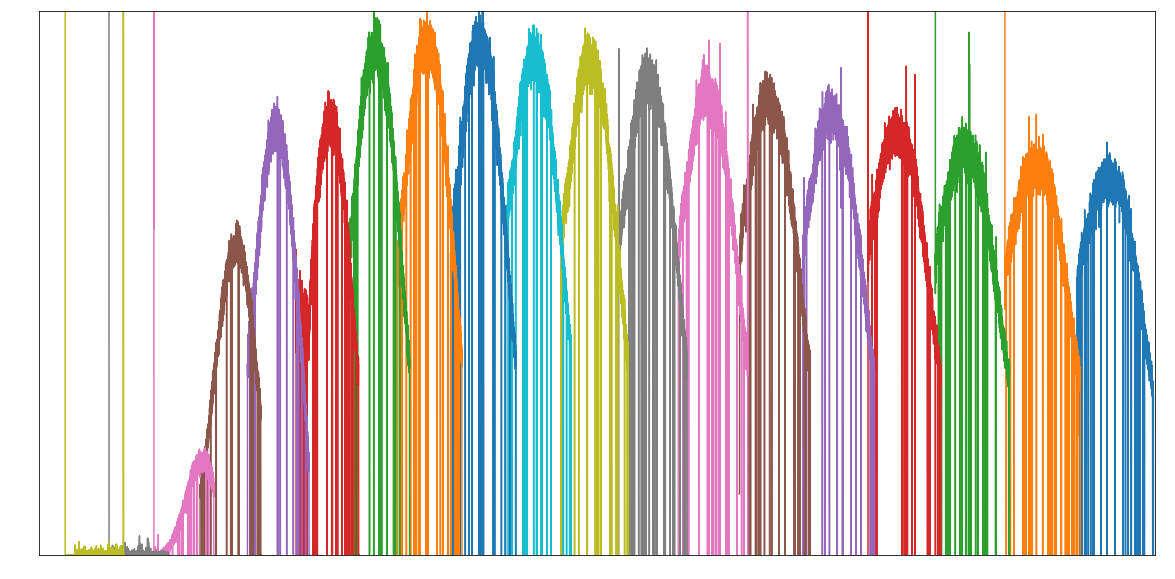

In [19]:
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    count = count +1
plt.xlim(4500,6000)
#plt.xlim(6550,6580)
plt.ylim(0,3000)
#plt.xlim(6290, 6310)

In [5]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0044G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])

(0, 2000)

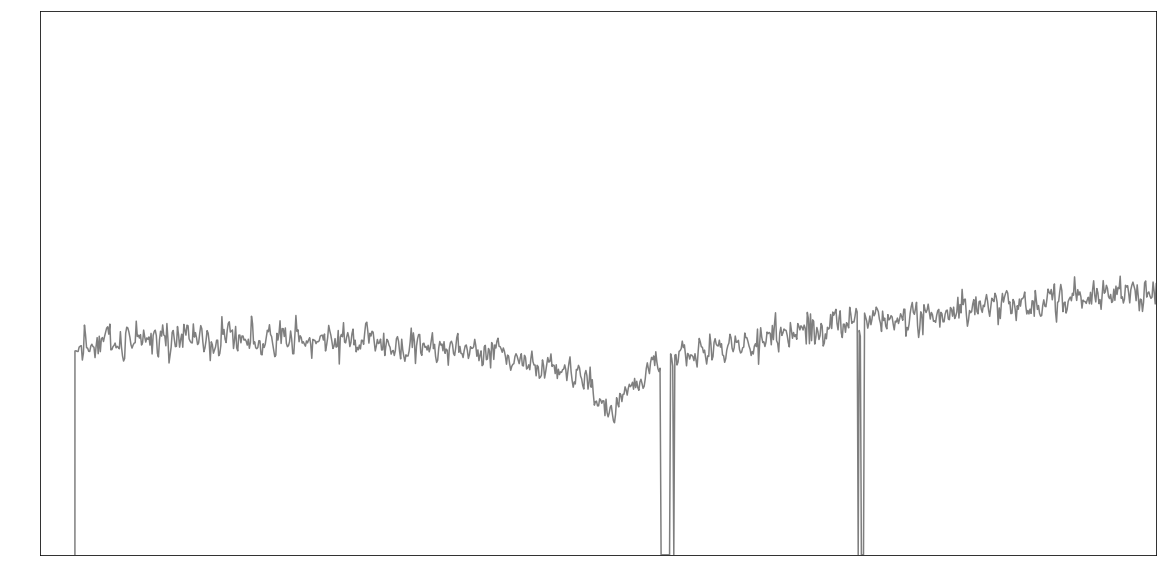

In [8]:
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    count = count +1
plt.xlim(6550,6580)
#plt.xlim(4500,6000)
plt.ylim(0,2000)

In [5]:
hiresDates = [56552.29983796,56552.32824074]

fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0043B.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
wavels = wavels[13]
fluxes = fluxes[13]
flx = fluxes[:-2000]
wvl = wavels[:-2000]
flx = fill_zeros_with_last(flx)
flx = flx/np.median(flx)
wvl = np.log10(wvl)
fluxesHIRES = flx
wavelsHIRES = wvl


fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0044B.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
    
wavels = wavels[13]
fluxes = fluxes[13]
flx = fluxes[:-2000]
wvl = wavels[:-2000]
flx = fill_zeros_with_last(flx)
flx = flx/np.median(flx)
wvl = np.log10(wvl)
fluxesHIRES = np.vstack((fluxesHIRES, flx))
wavelsHIRES = np.vstack((wavelsHIRES,wvl))


fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/43BC.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[0].data
    
fluxesHIRES = data
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/44BC.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[0].data
    
fluxesHIRES = np.vstack((fluxesHIRES, data))

<Quantity 40.74734804>

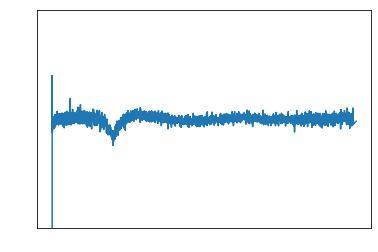

In [10]:
plt.plot(10**wavelsHIRES[1],fluxesHIRES[1])
plt.ylim(0,2)

spectrum = Spectrum1D(spectral_axis=10**wavelsHIRES[1]* u.AA, flux=fluxesHIRES[1]* u.Jy)
der = snr_derived(spectrum)
der

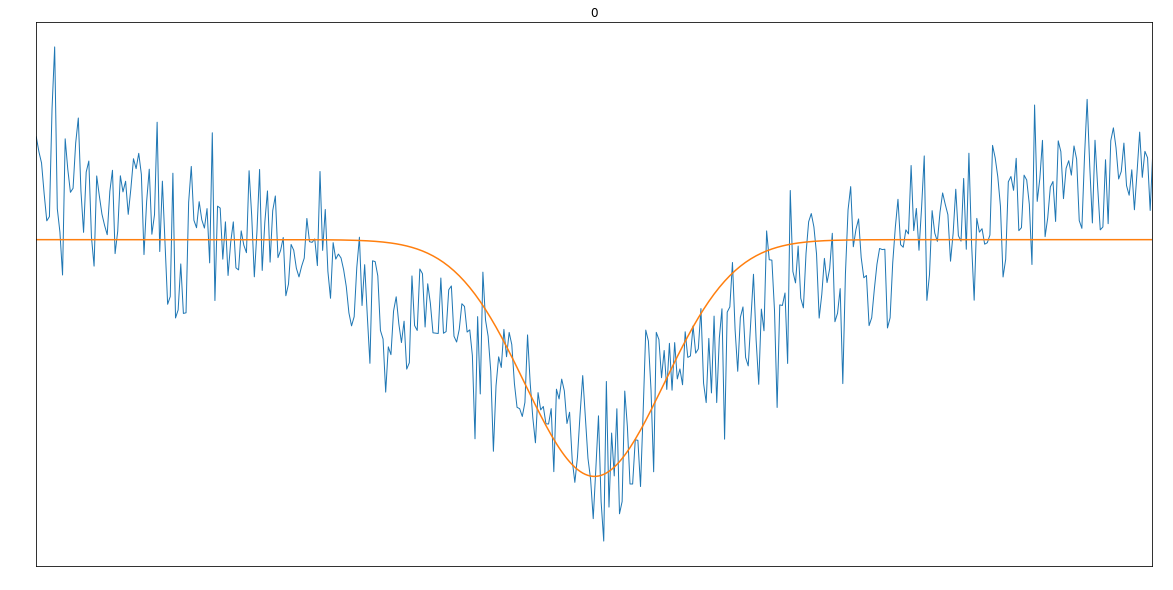

Parameters([('amp', <Parameter 'amp', value=-0.17159787629197798, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', value=3.6868022595471355, bounds=[-inf:inf]>), ('wid', <Parameter 'wid', value=5.000000080634948e-09, bounds=[1e-15:inf]>), ('off', <Parameter 'off', value=0.9776464514056162, bounds=[-inf:inf]>)])


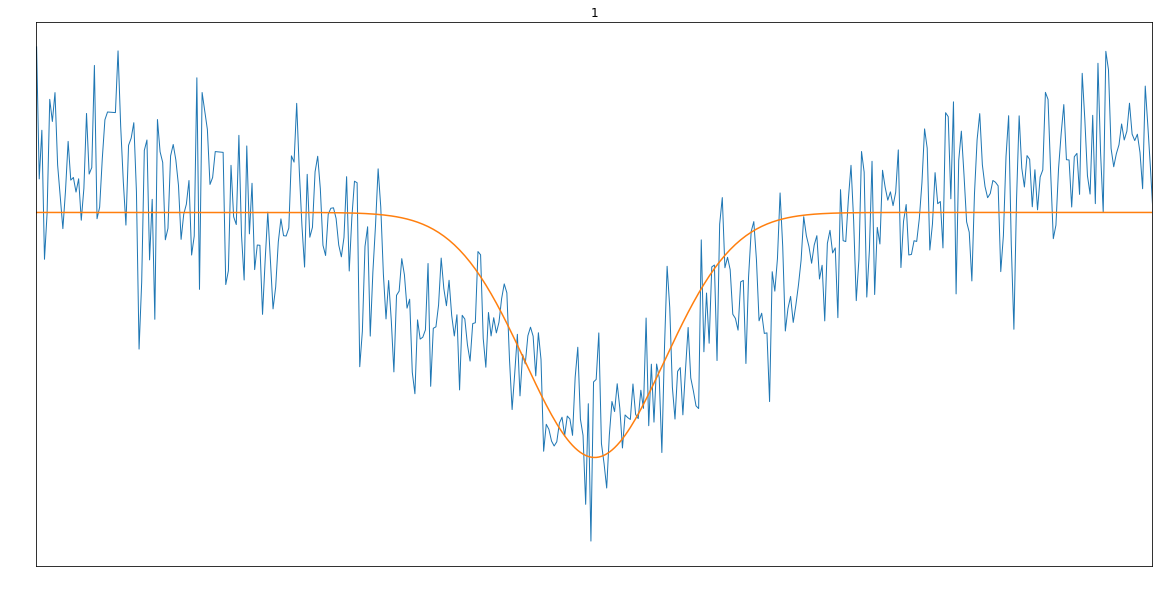

Parameters([('amp', <Parameter 'amp', value=-0.16049911078742518, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', value=3.6868134691061196, bounds=[-inf:inf]>), ('wid', <Parameter 'wid', value=5.000000080634948e-09, bounds=[1e-15:inf]>), ('off', <Parameter 'off', value=0.9727135231116246, bounds=[-inf:inf]>)])


In [11]:


params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=np.log10(4862))
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.45)
stdOfResiduals = []
count=0
offsetsBeta = []
wavelsAng = np.array(wavelsHIRES)
for el in fluxesHIRES:
    #plt.figure(figsize=(20,10))
    mod = Model(gaussian)
    indexSt = find_nearest(wavelsAng[count], np.log10(4860))
    indexFi = find_nearest(wavelsAng[count], np.log10(4862.5))
    fluxIn = fluxesHIRES[count][indexSt:indexFi+1]
    pixels = wavelsAng[count][indexSt:indexFi+1]
    #plt.plot(pixels,fluxIn)
    #plt.plot(pixels, gaussian(pixels, -0.06, 3.81715,0.000000005,0.26))
    pars = mod.make_params(amp=-0.06,cen=np.log10(4862),wid=0.000000005,off=0.45)
    result = mod.fit(fluxIn,params,x=pixels)
    cenEst = result.params['cen'].value
    mod = Model(gaussian)
    indexSt = find_nearest(wavelsAng[count], cenEst-0.0004)
    indexFi = find_nearest(wavelsAng[count], cenEst+0.0004)
    fluxIn = fluxesHIRES[count][indexSt:indexFi+1]
    pixels = wavelsAng[count][indexSt:indexFi+1]
    
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=cenEst)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)
    result = mod.fit(fluxIn,params,x=pixels)
    
    plt.figure(figsize=(20,10))
    plt.title(str(count))
    plt.plot(pixels,fluxIn,lw=1)
    #plt.ylim(0.3,1)
    plt.xlim(cenEst-0.0004,cenEst+0.0004)
    plt.plot(pixels,result.best_fit)
    plt.show()
    count = count +1
    print(result.params)
    residuals =  fluxIn-result.best_fit
    stdOfResiduals.append(np.std(residuals))
    offsetsBeta.append(result.params['cen'].value)
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=np.log10(4862))
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)


In [36]:
offsetsBeta

[3.6868022595471355, 3.6868134691061196]

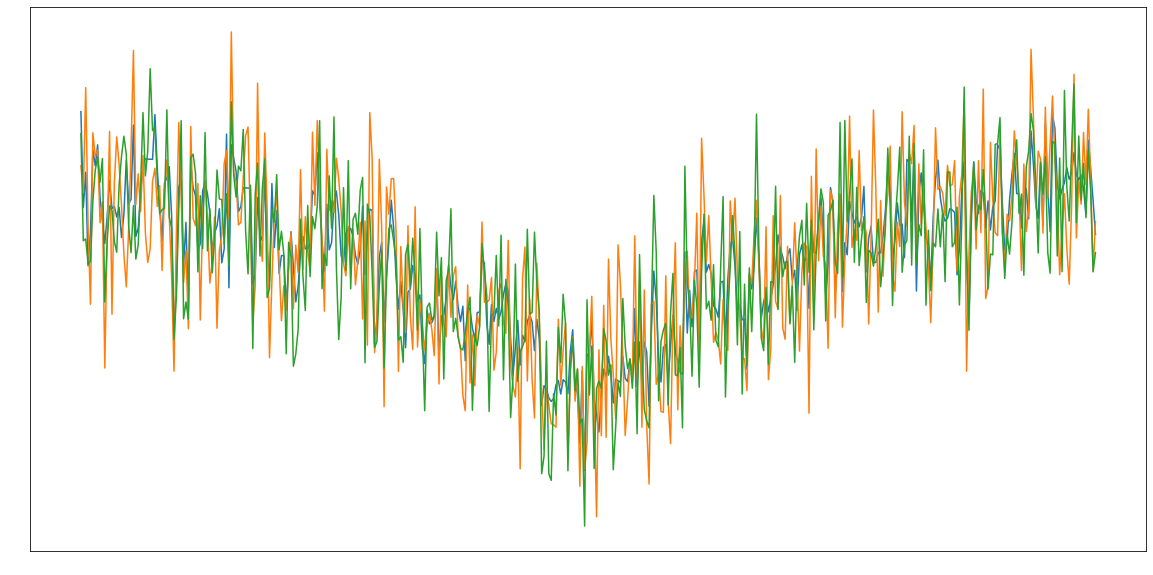

In [15]:
plt.figure(figsize=(20,10))
plt.plot(pixels,fluxIn)

errors = np.random.normal(0, stdOfResiduals[1], len(pixels))

plt.plot(pixels, fluxIn+errors)

errors = np.random.normal(0, stdOfResiduals[1], len(pixels))

plt.plot(pixels, fluxIn+errors)

In [23]:
fluxStack = fluxIn

for i in range(0,1000):
    fluxStack = np.vstack((fluxStack, fluxIn+np.random.normal(0, stdOfResiduals[1], len(pixels))))


In [24]:


params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=np.log10(4862))
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.45)
count=0
offsetsBeta = []
wavelsAng = np.array(wavelsHIRES)
for el in fluxStack:
    #plt.figure(figsize=(20,10))
    
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=cenEst)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)
    result = mod.fit(el,params,x=pixels)
    

    count = count +1
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=np.log10(4862))
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)
    
    offsetsBeta.append(result.params['cen'].value)


(array([  5.,  33.,  94., 165., 253., 270., 136.,  37.,   6.,   2.]),
 array([3.68679876, 3.68680191, 3.68680505, 3.6868082 , 3.68681134,
        3.68681449, 3.68681763, 3.68682078, 3.68682392, 3.68682707,
        3.68683021]),
 <a list of 10 Patch objects>)

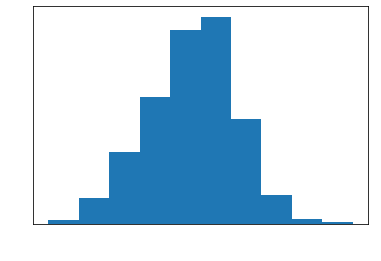

In [25]:
plt.hist(offsetsBeta)

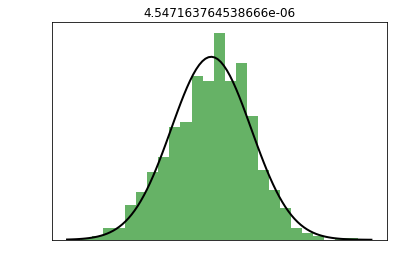

In [28]:



# Generate some data for this demonstration.
data = offsetsBeta

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = std
plt.title(title)

plt.show()

In [30]:

offsetsAlphaS = np.array([mu+std, mu-std])
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 4861.363 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
offsetsAlphaS

array([41.47264143, 35.19404583])

In [45]:


esovlt = EarthLocation.from_geodetic(lat=19.82833333*u.deg, lon=-155.47833333*u.deg, height=4160*u.m)
sc = SkyCoord("00:13:21.0725724609 +28:20:19.825834604", frame=ICRS, unit=(u.hourangle, u.deg))
baryCorr = []
for el in hiresDates:
    barycorr = sc.radial_velocity_correction(obstime=Time(el, format='mjd'), location=esovlt)  
    baryCorr.append(barycorr.to(u.km/u.s).value)
    
offsetsAlphaS = np.array(offsetsBeta)
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 4861.363 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
offsetsAlphaS = offsetsAlphaS + baryCorr
offsetsAlphaS

offsetsBetaHIRES = offsetsAlphaS

In [46]:
offsetsBetaHIRES

array([39.94273573, 47.62467915])

In [11]:
hiresDates = [56552.29983796,56552.32824074]

fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0043G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
wavels = wavels[7]
fluxes = fluxes[7]
flx = fluxes[:-2000]
wvl = wavels[:-2000]
flx = fill_zeros_with_last(flx)
flx = flx/np.median(flx)
wvl = np.log10(wvl)
fluxesHIRES = flx
wavelsHIRES = wvl


fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/Obj_0044G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
    
wavels = wavels[7]
fluxes = fluxes[7]
flx = fluxes[:-2000]
wvl = wavels[:-2000]
flx = fill_zeros_with_last(flx)
flx = flx/np.median(flx)
wvl = np.log10(wvl)
fluxesHIRES = np.vstack((fluxesHIRES, flx))
wavelsHIRES = np.vstack((wavelsHIRES,wvl))


fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/43GC.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[0].data
    
fluxesHIRES = data
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/44GC.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[0].data
    
fluxesHIRES = np.vstack((fluxesHIRES, data))

<Quantity 32.48944654>

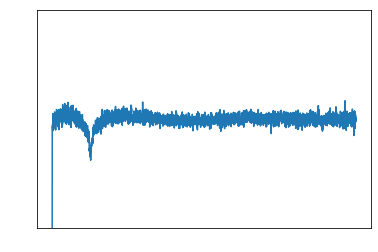

In [13]:
plt.plot(10**wavelsHIRES[1],fluxesHIRES[1])
plt.ylim(0,2)

spectrum = Spectrum1D(spectral_axis=10**wavelsHIRES[1]* u.AA, flux=fluxesHIRES[1]* u.Jy)
der = snr_derived(spectrum)
der

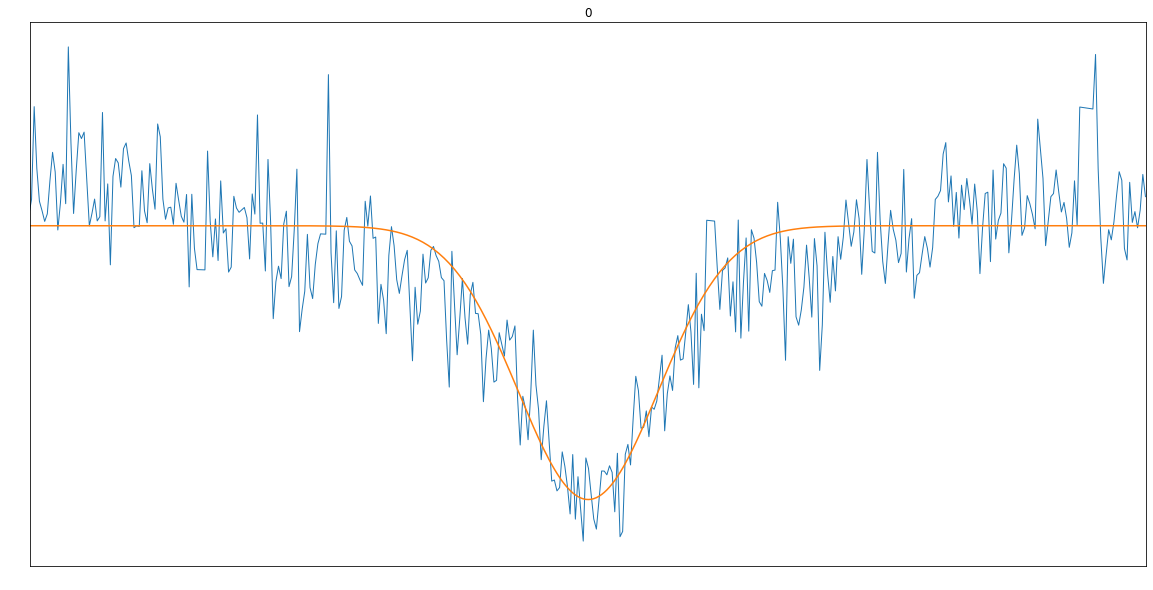

Parameters([('amp', <Parameter 'amp', value=-0.2747392526696836, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', value=3.817255182454148, bounds=[-inf:inf]>), ('wid', <Parameter 'wid', value=5.000000080634948e-09, bounds=[1e-15:inf]>), ('off', <Parameter 'off', value=0.9709652789674011, bounds=[-inf:inf]>)])


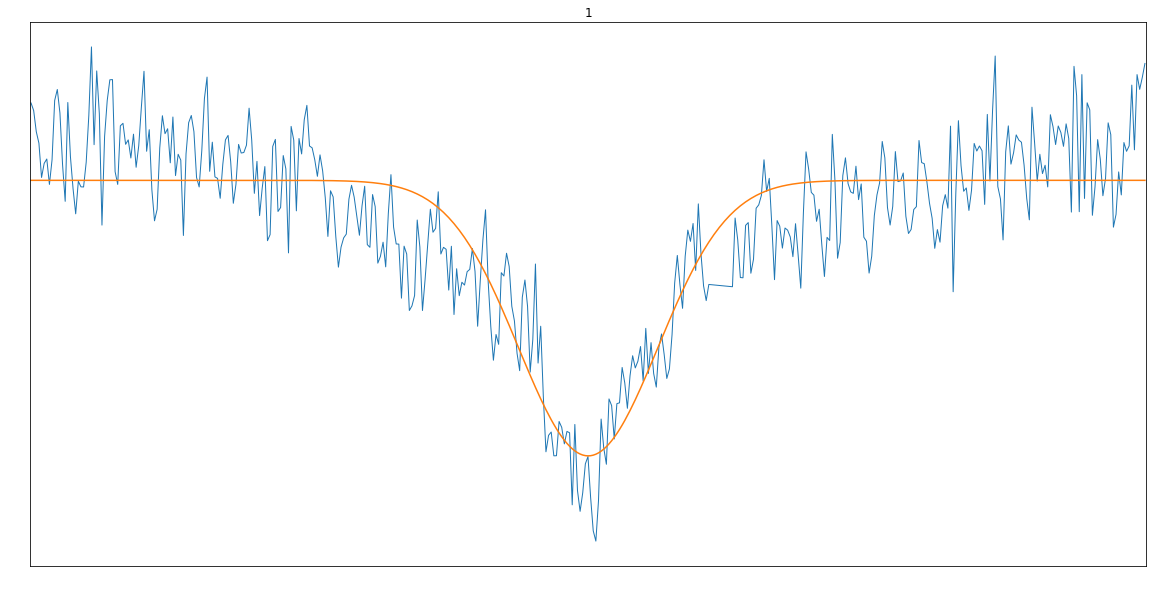

Parameters([('amp', <Parameter 'amp', value=-0.26547131540869007, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', value=3.817259307775637, bounds=[-inf:inf]>), ('wid', <Parameter 'wid', value=5.000000080634948e-09, bounds=[1e-15:inf]>), ('off', <Parameter 'off', value=0.9692493524293131, bounds=[-inf:inf]>)])


In [34]:
###########actual science

params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=3.8172)
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.45)
stdOfResiduals = []
count=0
offsetsAlpha = []
wavelsAng = np.array(wavelsHIRES)
for el in fluxesHIRES:
    #plt.figure(figsize=(20,10))
    mod = Model(gaussian)
    indexSt = find_nearest(wavelsAng[count], 3.8169)
    indexFi = find_nearest(wavelsAng[count], 3.8175)
    fluxIn = fluxesHIRES[count][indexSt:indexFi+1]
    pixels = wavelsAng[count][indexSt:indexFi+1]
    #plt.plot(pixels,fluxIn)
    #plt.plot(pixels, gaussian(pixels, -0.06, 3.81715,0.000000005,0.26))
    pars = mod.make_params(amp=-0.06,cen=3.8172,wid=0.000000005,off=0.45)
    result = mod.fit(fluxIn,params,x=pixels)
    cenEst = result.params['cen'].value
    mod = Model(gaussian)
    indexSt = find_nearest(wavelsAng[count], cenEst-0.0004)
    indexFi = find_nearest(wavelsAng[count], cenEst+0.0004)
    fluxIn = fluxesHIRES[count][indexSt:indexFi+1]
    pixels = wavelsAng[count][indexSt:indexFi+1]
    
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=cenEst)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)
    result = mod.fit(fluxIn,params,x=pixels)
    
    plt.figure(figsize=(20,10))
    plt.title(str(count))
    plt.plot(pixels,fluxIn,lw=1)
    #plt.ylim(0.3,1)
    plt.xlim(cenEst-0.0004,cenEst+0.0004)
    plt.plot(pixels,result.best_fit)
    plt.show()
    if count == 0:
        pixels1 = pixels
        fluxIn1 = fluxIn
    else:
        pixels2 = pixels
        fluxIn2 = fluxIn
    count = count +1
    print(result.params)
    residuals =  fluxIn-result.best_fit
    stdOfResiduals.append(np.std(residuals))
    offsetsAlpha.append(result.params['cen'].value)
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=3.8172)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)


In [35]:
fluxStack1 = fluxIn1

for i in range(0,1000):
    fluxStack1 = np.vstack((fluxStack1, fluxIn1+np.random.normal(0, stdOfResiduals[0], len(pixels1))))
    
fluxStack2 = fluxIn2

for i in range(0,1000):
    fluxStack2 = np.vstack((fluxStack2, fluxIn2+np.random.normal(0, stdOfResiduals[1], len(pixels2))))

In [36]:
###########actual science

params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=3.8172)
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.45)
count=0
offsetsAlphaStd = []
for el in fluxStack1:
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=3.8172)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)
    result = mod.fit(el,params,x=pixels1)
    offsetsAlphaStd.append(result.params['cen'].value)
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=3.8172)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)


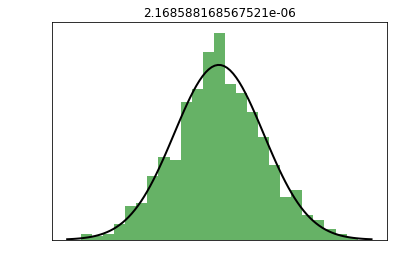

In [39]:


# Generate some data for this demonstration.
data = offsetsAlphaStd

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = std
plt.title(title)

plt.show()

In [40]:

offsetsAlphaS = np.array([mu+std, mu-std])
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 6564.614 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
offsetsAlphaS

array([33.25577266, 30.26151288])

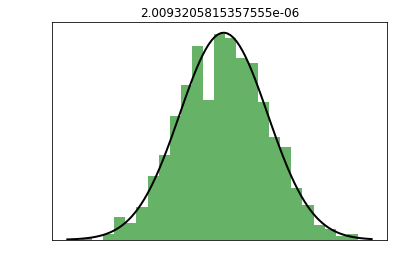

In [42]:
###########actual science

params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=3.8172)
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.45)
count=0
offsetsAlphaStd = []
for el in fluxStack2:
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=3.8172)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)
    result = mod.fit(el,params,x=pixels2)
    offsetsAlphaStd.append(result.params['cen'].value)
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=3.8172)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.45)

    


# Generate some data for this demonstration.
data = offsetsAlphaStd

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = std
plt.title(title)

plt.show()

In [43]:

offsetsAlphaS = np.array([mu+std, mu-std])
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 6564.614 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
print(offsetsAlphaS)
print(offsetsAlphaS[0]-offsetsAlphaS[1])

[36.00945394 33.23507504]
2.774378898912296


In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

41.17126704+-2.99
 
43.96240554+-2.77


32.01313222+-8.64

37.52467734+-26.2


In [5]:


esovlt = EarthLocation.from_geodetic(lat=19.82833333*u.deg, lon=-155.47833333*u.deg, height=4160*u.m)
sc = SkyCoord("00:13:21.0725724609 +28:20:19.825834604", frame=ICRS, unit=(u.hourangle, u.deg))
baryCorr = []
for el in hiresDates:
    barycorr = sc.radial_velocity_correction(obstime=Time(el, format='mjd'), location=esovlt)  
    baryCorr.append(barycorr.to(u.km/u.s).value)
    
offsetsAlphaS = np.array(offsetsAlpha)
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 6562.801 #air
halpharest = 6564.614 #vacuum
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
offsetsAlphaS = offsetsAlphaS + baryCorr
print(offsetsAlphaS)

offsetsAlphaHIRES = offsetsAlphaS

[41.17126704 43.96240554]


5019.395986186465
4949.6685972733485
4881.88352919719
4815.903788323564
4751.701707160022
4689.189134282514
4628.301689072637
4568.977470317239
4511.137378848229
4454.763499707749
4399.780888265387
4346.155311087991
4293.797728069852
4242.6963661016525
4192.803113550418
4144.071596845368
4096.457103384835
4061.0483667713606


(200, 400)

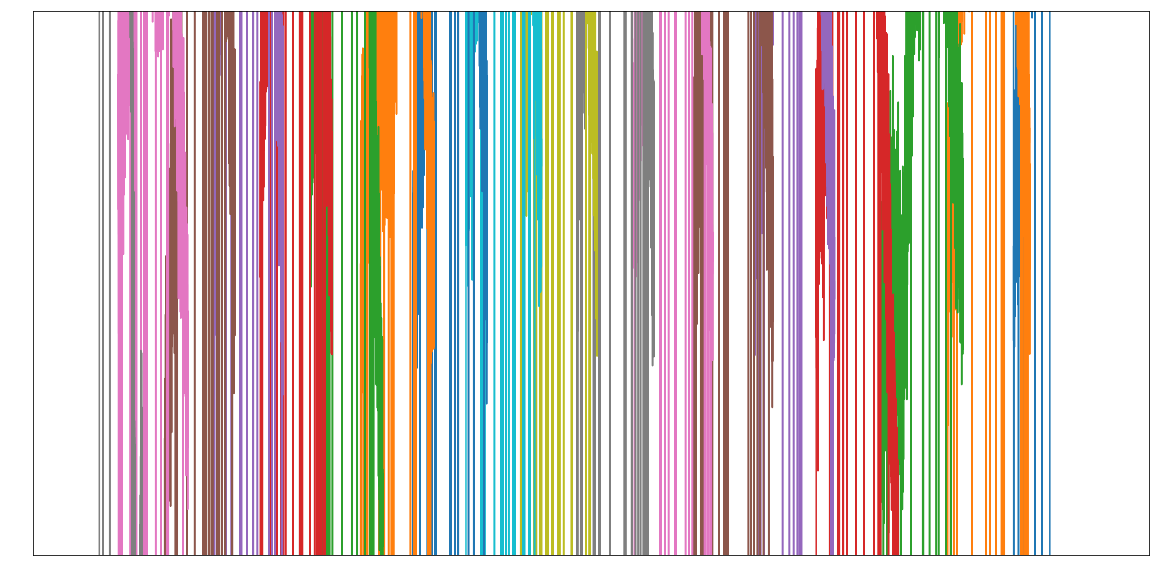

In [27]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/20130920/Obj_0030G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
    hdr = hdul[1].header
    #print(repr(hdr))
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
    
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    print(np.mean(wavels[count][:-2000]))
    count = count +1
#plt.xlim(4850,4870)
plt.ylim(200,400)

(50, 125)

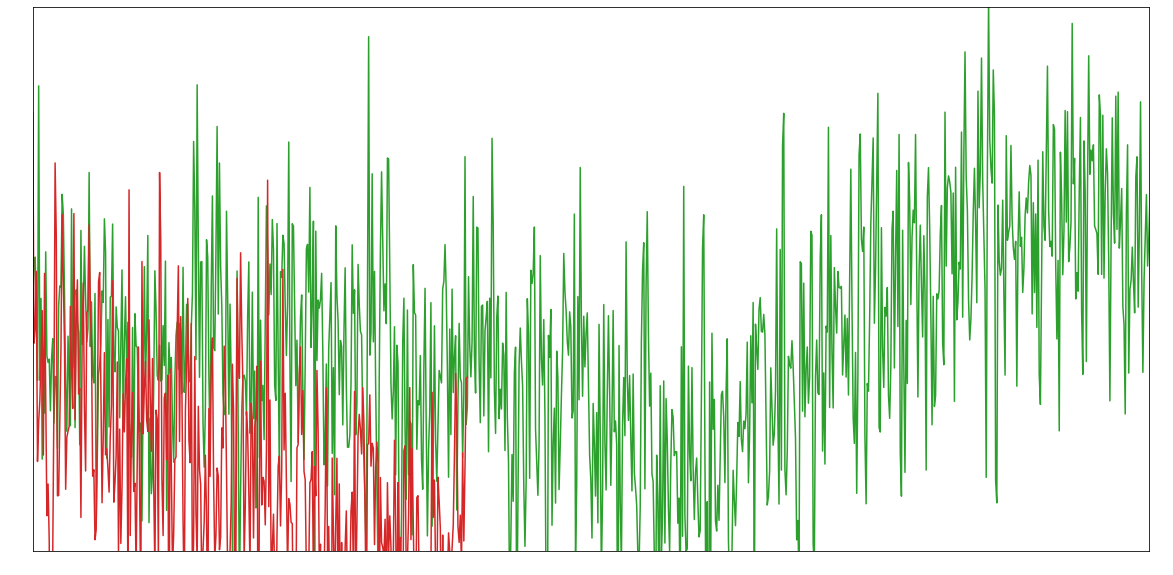

In [25]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/20130920/Obj_0031G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
    hdr = hdul[1].header
    #print(repr(hdr))
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
    
plt.figure(figsize=(20,10))
count = 0
for el in fluxes:
    plt.plot(wavels[count][:-2000], el[:-2000])
    count = count +1
plt.xlim(4850,4870)
plt.ylim(50,125)

(0, 2)

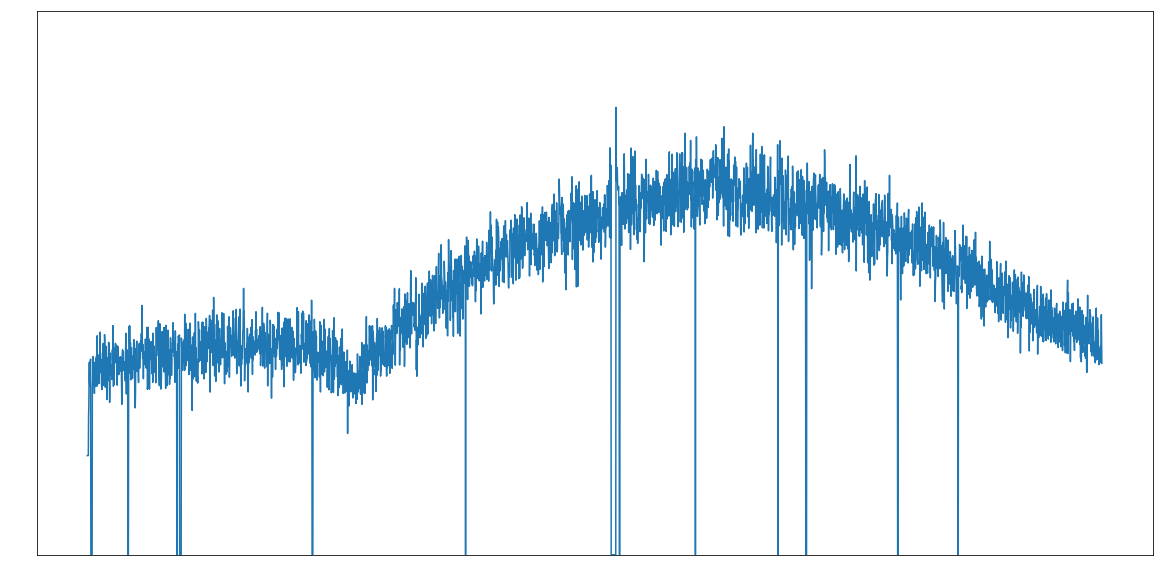

In [44]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/20130920/Obj_0030G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
    hdr = hdul[1].header
    #print(repr(hdr))
#print(data[34])

wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
    
plt.figure(figsize=(20,10))
count = 0
flux = fluxes[2][:-2000]/np.mean(fluxes[2][:-2000])
wavel = np.log10(wavels[2][:-2000])
plt.plot(wavel, flux)
#plt.xlim(4850,4870)
plt.ylim(0,2)


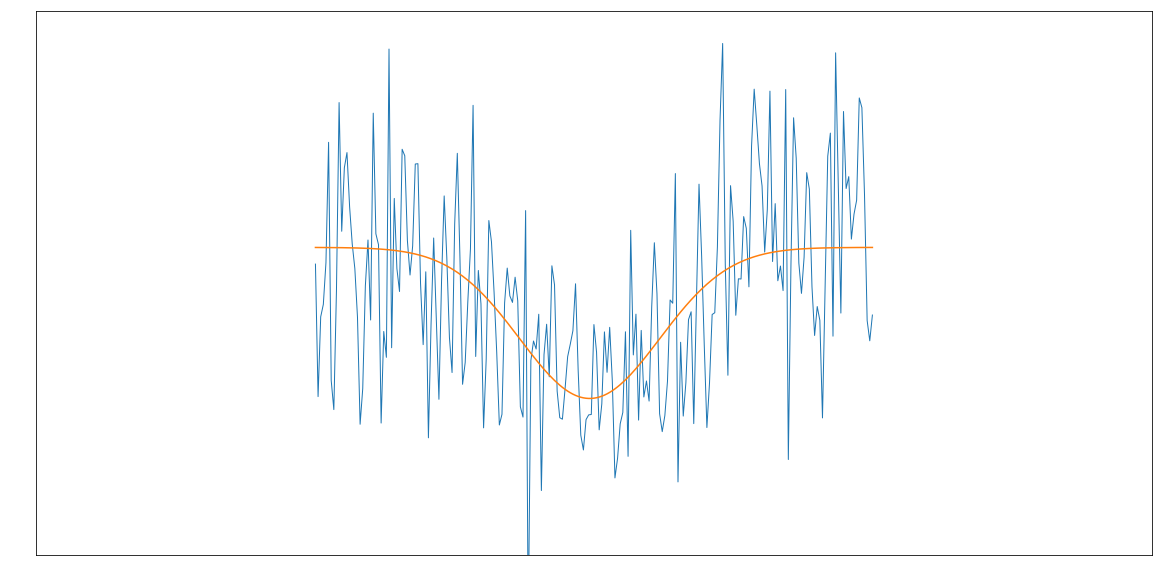

Parameters([('amp', <Parameter 'amp', value=-0.11115176077085075, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', value=3.6867926681251557, bounds=[-inf:inf]>), ('wid', <Parameter 'wid', value=5.000000080634948e-09, bounds=[1e-15:inf]>), ('off', <Parameter 'off', value=0.7261943798052456, bounds=[-inf:inf]>)])


In [45]:
offsets2 = []

params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=np.log10(4862))
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.75)

count=0
wavelsAng = np.array(wavel)

mod = Model(gaussian)
indexSt = find_nearest(wavelsAng, np.log10(4860))
indexFi = find_nearest(wavelsAng, np.log10(4862.5))
fluxIn = flux[indexSt:indexFi+1]
pixels = wavelsAng[indexSt:indexFi+1]
pars = mod.make_params(amp=-0.06,cen=np.log10(4862),wid=0.000000005,off=0.75)
result = mod.fit(fluxIn,params,x=pixels)
cenEst = result.params['cen'].value
mod = Model(gaussian)
indexSt = find_nearest(wavelsAng, cenEst-0.0002)
indexFi = find_nearest(wavelsAng, cenEst+0.0002)
fluxIn = flux[indexSt:indexFi+1]
pixels = wavelsAng[indexSt:indexFi+1]
    
params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=cenEst)
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.75)
result = mod.fit(fluxIn,params,x=pixels)
residuals =  fluxIn-result.best_fit
stdRes = np.std(residuals)
plt.figure(figsize=(20,10))
plt.plot(pixels,fluxIn,lw=1)
    #plt.ylim(0.3,1)
plt.xlim(cenEst-0.0004,cenEst+0.0004)
plt.plot(pixels,result.best_fit)
plt.ylim(0.5,0.9)
plt.show()
print(result.params)

offsets2.append(result.params['cen'].value)

In [46]:
fluxStack = fluxIn

for i in range(0,1000):
    fluxStack = np.vstack((fluxStack, fluxIn+np.random.normal(0, stdRes, len(pixels))))

    
offsets2 = []

for el in fluxStack:
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=np.log10(4862))
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.75)
    result = mod.fit(el,params,x=pixels)
    offsets2.append(result.params['cen'].value)

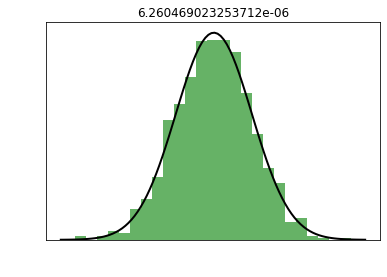

In [47]:
data = offsets2

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = std
plt.title(title)

plt.show()

In [48]:
offsetsAlphaS = np.array([mu+std, mu-std])
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 4861.363 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
print(offsetsAlphaS)
print(offsetsAlphaS[0]-offsetsAlphaS[1])

[28.05698949 19.41313115]
8.643858337526598


(0, 2)

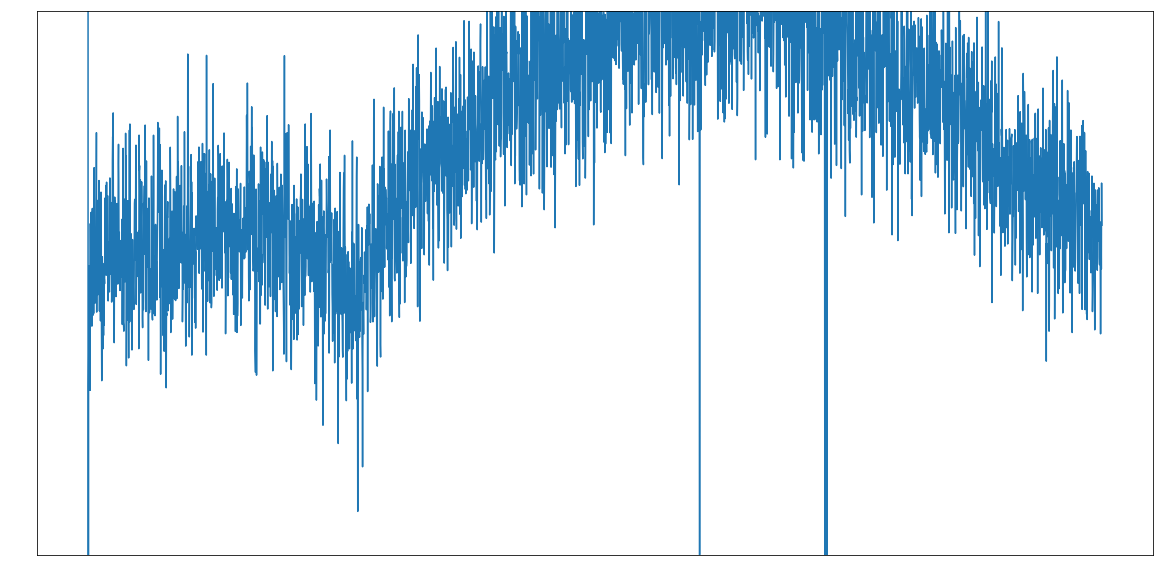

In [3]:
fits_image_filename = '/home/nwal/Desktop/PG0010/HIRES/20130920/Obj_0031G.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
    hdr = hdul[1].header
    #print(repr(hdr))
wavels = []
fluxes = []
for el in data:
    wavels.append(el[24])
    fluxes.append(el[25])
    
plt.figure(figsize=(20,10))
count = 0
flux = fluxes[2][:-2000]/np.mean(fluxes[2][:-2000])
wavel = np.log10(wavels[2][:-2000])
plt.plot(wavel, flux)
#plt.xlim(4850,4870)
plt.ylim(0,2)


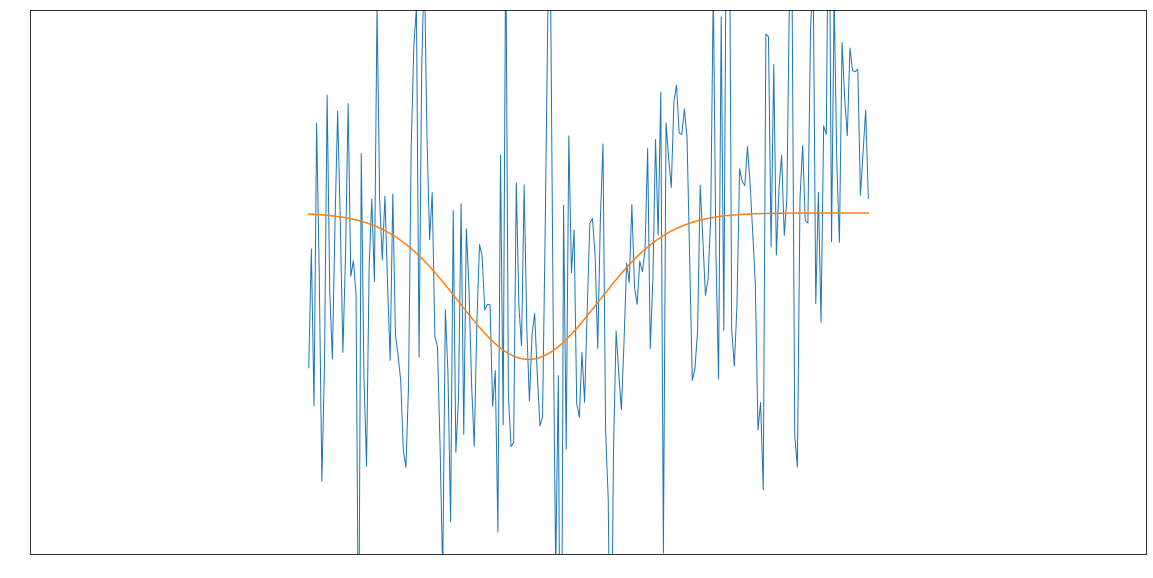

Parameters([('amp', <Parameter 'amp', value=-0.21544677207836221, bounds=[-inf:inf]>), ('cen', <Parameter 'cen', value=3.686800714932944, bounds=[-inf:inf]>), ('wid', <Parameter 'wid', value=5.000000080634948e-09, bounds=[1e-15:inf]>), ('off', <Parameter 'off', value=1.1015224012978595, bounds=[-inf:inf]>)])


In [4]:
offsets2 = []

params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=np.log10(4862))
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.75)

count=0
wavelsAng = np.array(wavel)

mod = Model(gaussian)
indexSt = find_nearest(wavelsAng, np.log10(4860))
indexFi = find_nearest(wavelsAng, np.log10(4862.5))
fluxIn = flux[indexSt:indexFi+1]
pixels = wavelsAng[indexSt:indexFi+1]
pars = mod.make_params(amp=-0.06,cen=np.log10(4862),wid=0.000000005,off=0.75)
result = mod.fit(fluxIn,params,x=pixels)
cenEst = result.params['cen'].value
mod = Model(gaussian)
indexSt = find_nearest(wavelsAng, cenEst-0.0002)
indexFi = find_nearest(wavelsAng, cenEst+0.0002)
fluxIn = flux[indexSt:indexFi+1]
pixels = wavelsAng[indexSt:indexFi+1]
    
params = Parameters()
params.add('amp', value=-0.06)
params.add('cen', value=cenEst)
params.add('wid', value=0.000000005, min=1e-15)
params.add('off', value=0.75)
result = mod.fit(fluxIn,params,x=pixels)
residuals =  fluxIn-result.best_fit
stdRes = np.std(residuals)
plt.figure(figsize=(20,10))
plt.plot(pixels,fluxIn,lw=1)
    #plt.ylim(0.3,1)
plt.xlim(cenEst-0.0004,cenEst+0.0004)
plt.plot(pixels,result.best_fit)
plt.ylim(0.6,1.4)
plt.show()
print(result.params)

offsets2.append(result.params['cen'].value)

In [8]:
fluxStack = fluxIn

for i in range(0,1000):
    fluxStack = np.vstack((fluxStack, fluxIn+np.random.normal(0, stdRes, len(pixels))))

    
offsets2 = []

for el in fluxStack:
    params = Parameters()
    params.add('amp', value=-0.06)
    params.add('cen', value=np.log10(4862), min=3.68665,max=3.687)
    params.add('wid', value=0.000000005, min=1e-15)
    params.add('off', value=0.75)
    result = mod.fit(el,params,x=pixels)
    offsets2.append(result.params['cen'].value)

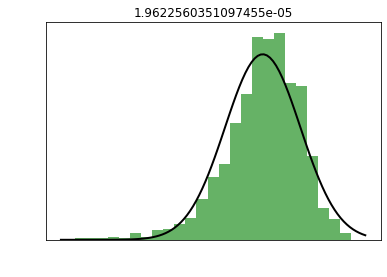

In [9]:
data = offsets2

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = std
plt.title(title)

plt.show()

In [10]:
offsetsAlphaS = np.array([mu+std, mu-std])
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 4861.363 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
print(offsetsAlphaS)
print(offsetsAlphaS[0]-offsetsAlphaS[1])

[41.09695633 14.00365237]
27.093303961312056


In [75]:
offsets2

[3.6867926681251557, 3.686800714932944]

In [77]:

hiresDates2 = [56555.297305, 56555.318738]
esovlt = EarthLocation.from_geodetic(lat=19.82833333*u.deg, lon=-155.47833333*u.deg, height=4160*u.m)
sc = SkyCoord("00:13:21.0725724609 +28:20:19.825834604", frame=ICRS, unit=(u.hourangle, u.deg))
baryCorr = []
for el in hiresDates2:
    barycorr = sc.radial_velocity_correction(obstime=Time(el, format='mjd'), location=esovlt)  
    baryCorr.append(barycorr.to(u.km/u.s).value)
    
offsetsAlphaS = np.array(offsets2)
offsetsAlpha = 10**np.array(offsetsAlphaS)

offsetsAlphaS = offsetsAlpha

halpharest = 4861.363 #air
offsetsAlphaS = (offsetsAlphaS - halpharest)/halpharest
offsetsAlphaS = (offsetsAlphaS)*(299792458/1000)
offsetsAlphaS = offsetsAlphaS + baryCorr
offsetsAlphaS

offsetsBetaHIRES = offsetsAlphaS

In [78]:
offsetsAlphaS

array([32.01313222, 37.52467734])

In [47]:
fits_image_filename = '/home/nwal/Desktop/gd356WHTuband/wd163.fits'
with fits.open(fits_image_filename) as hdul:
    data = hdul[1].data
    data2 = hdul[2].data
    data3 = hdul[3].data
    hdr = hdul[1].header
    print(repr(hdr))
    print('=============')
    hdr = hdul[0].header
    print(repr(hdr))

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -64 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 3901 /                                                
NAXIS2  =                   55 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                
SIMPLE  =                    T /Primary Header created by MWRFITS v1.11         
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /Extensions may be present                       


In [21]:
data3

array([[10.150262, 10.075316, 10.63967 , ...,  0.      ,  0.      ,
         0.      ],
       [10.201979, 10.379349, 10.252374, ...,  9.619793, 10.189302,
         9.76323 ],
       [ 9.903768, 10.054837, 10.04728 , ...,  9.973475,  9.663831,
         9.915454],
       ...,
       [14.468717, 14.630319, 14.877476, ..., 16.948364, 17.504595,
        15.173614],
       [14.34728 , 14.430362, 14.84581 , ..., 15.093774, 14.939811,
        14.6754  ],
       [14.728255,  9.779007,  6.964947, ..., 13.955457, 14.685347,
        14.929287]], dtype=float32)

In [9]:
data2

array([[202.63101, 202.37653, 230.59204, ...,   0.     ,   0.     ,
          0.     ],
       [210.85165, 214.2763 , 208.92627, ..., 180.2958 , 197.15723,
        177.55328],
       [190.92448, 196.64716, 197.97578, ..., 194.60208, 184.48047,
        188.69513],
       ...,
       [434.4514 , 425.24323, 439.6236 , ..., 366.90552, 381.15125,
        471.1914 ],
       [413.89374, 407.5158 , 462.1756 , ..., 455.29028, 446.45758,
        430.50415],
       [435.5594 , 152.70354,  10.91548, ..., 388.04004, 418.81903,
        433.0946 ]], dtype=float32)

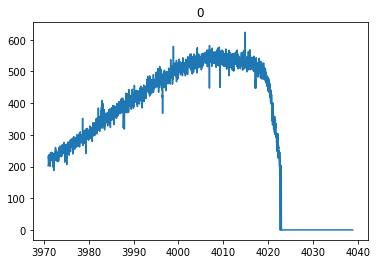

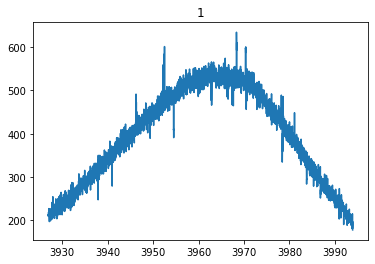

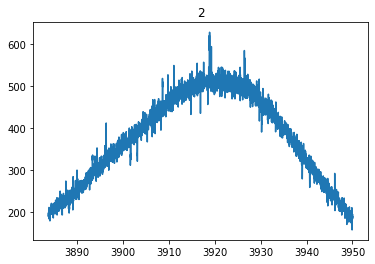

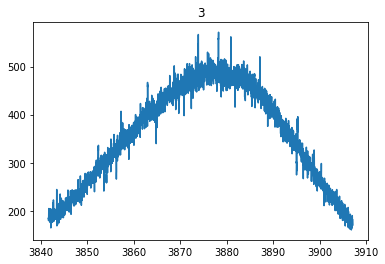

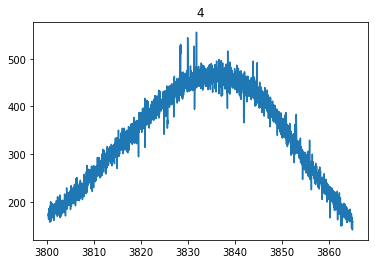

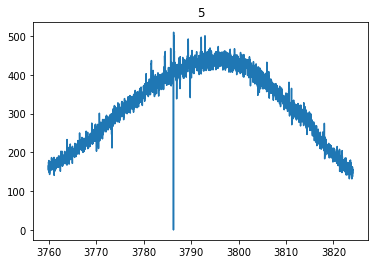

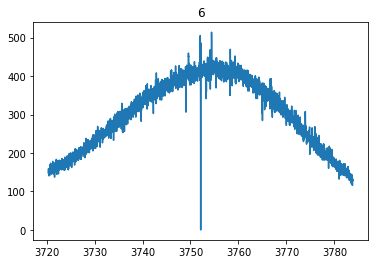

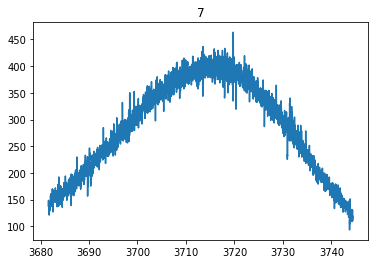

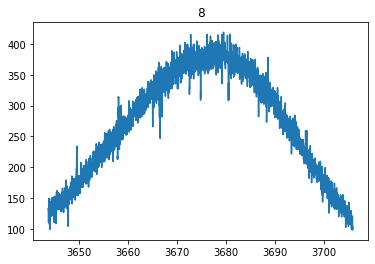

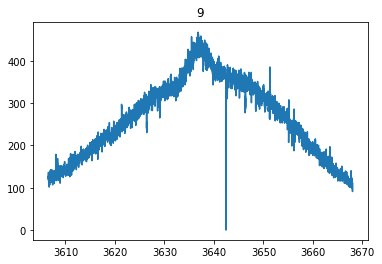

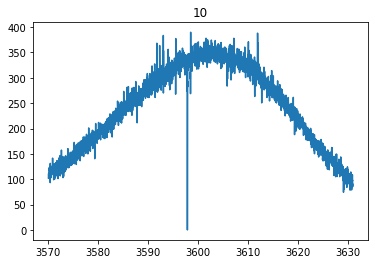

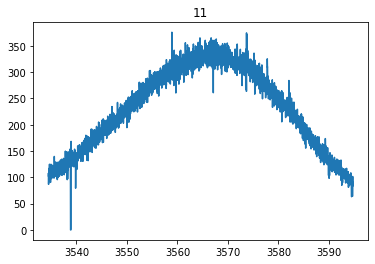

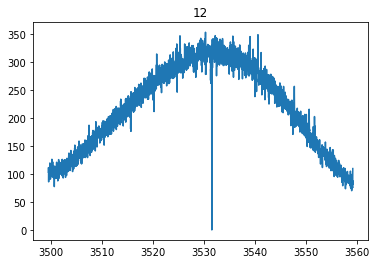

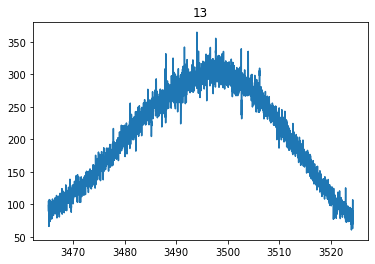

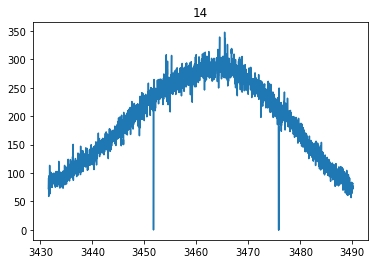

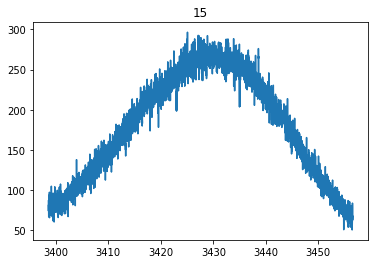

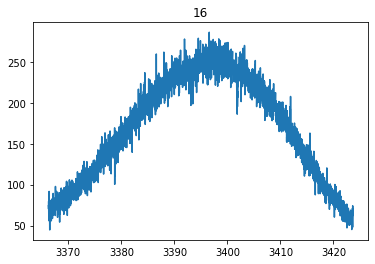

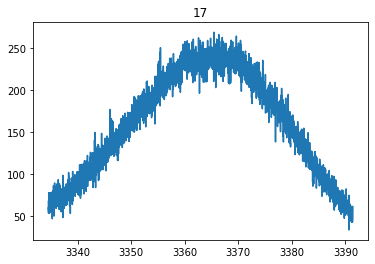

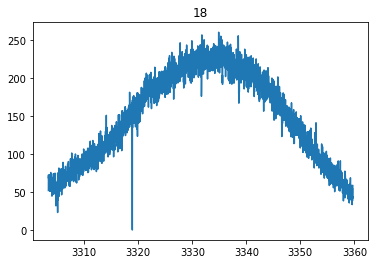

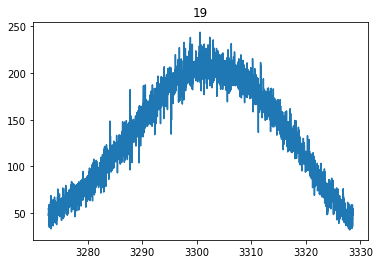

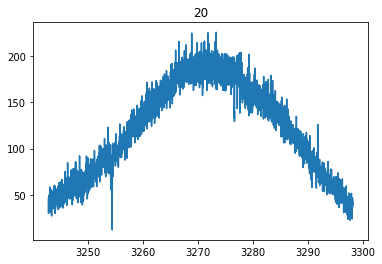

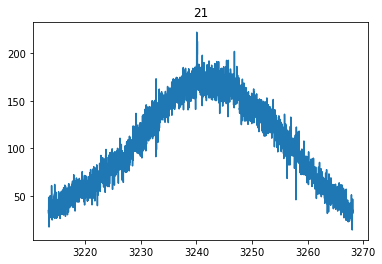

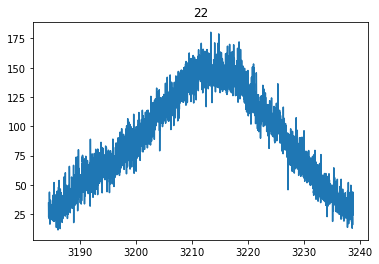

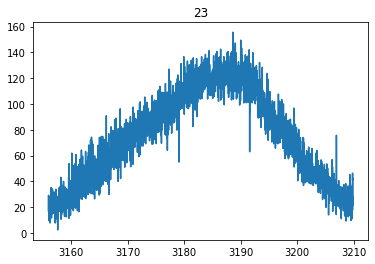

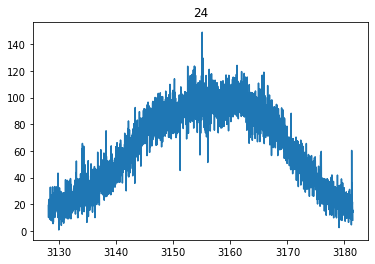

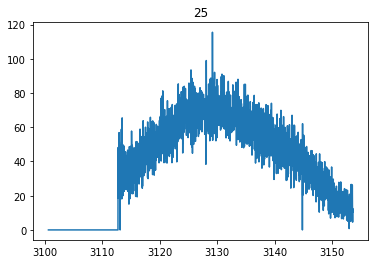

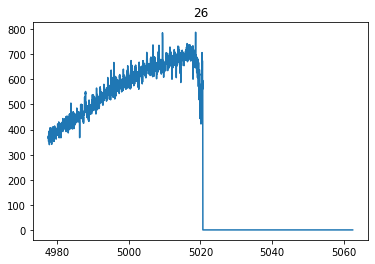

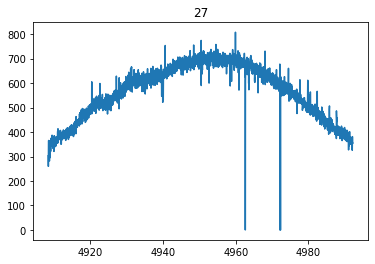

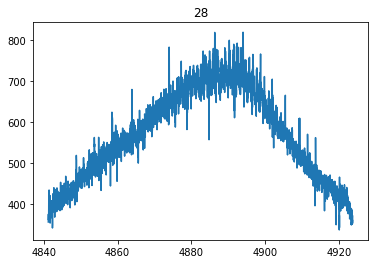

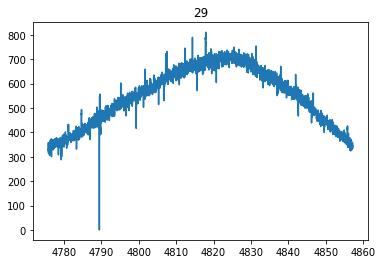

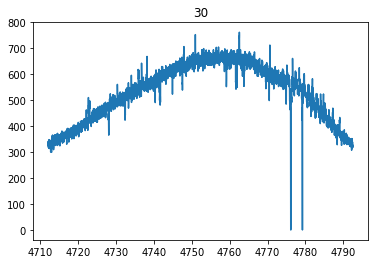

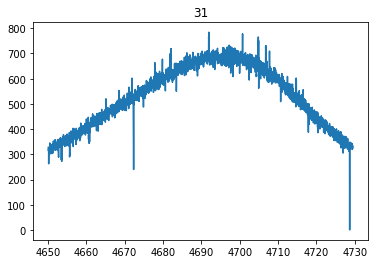

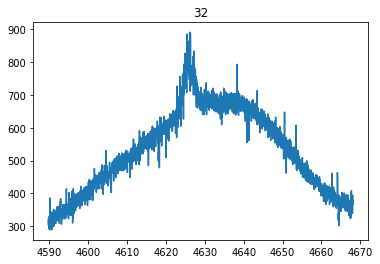

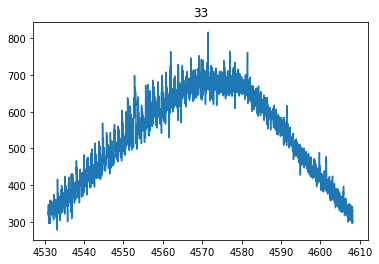

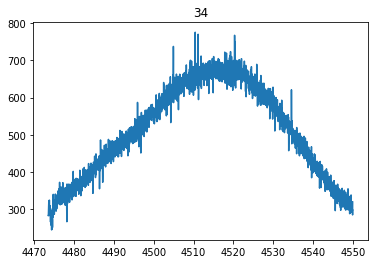

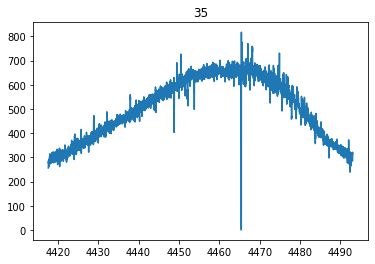

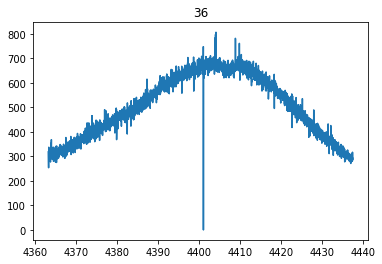

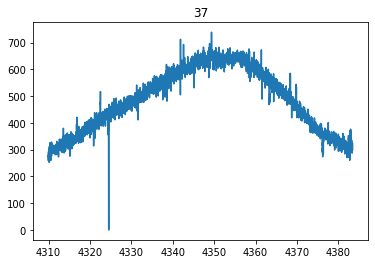

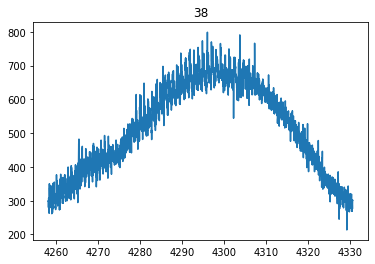

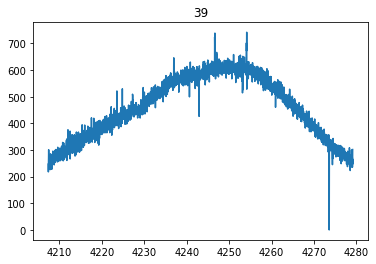

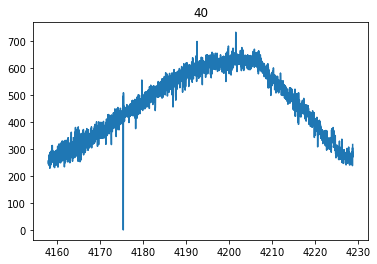

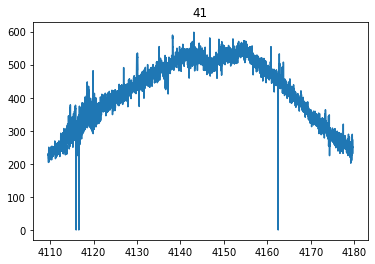

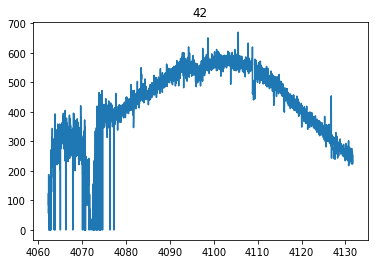

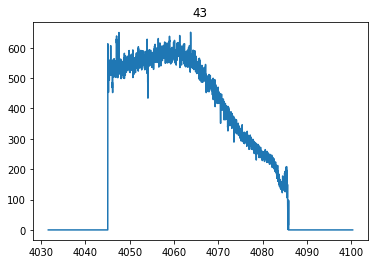

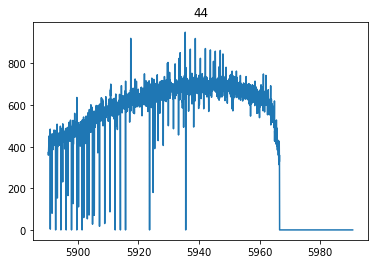

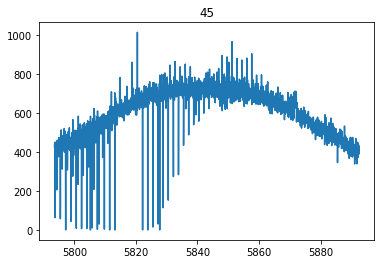

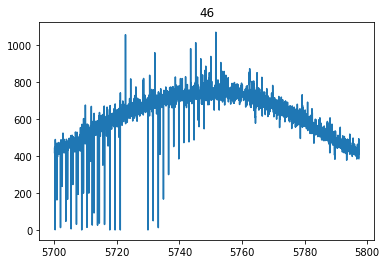

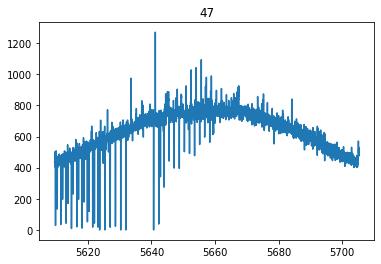

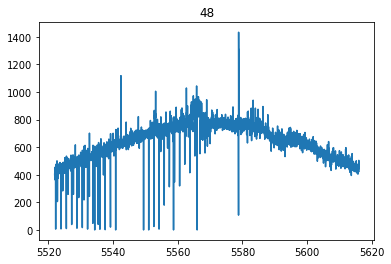

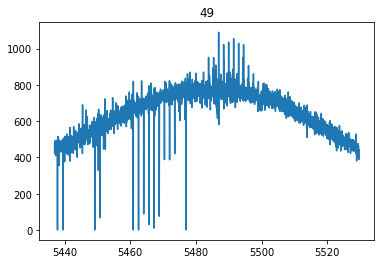

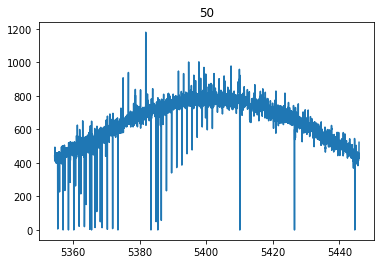

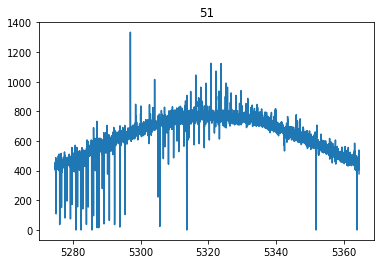

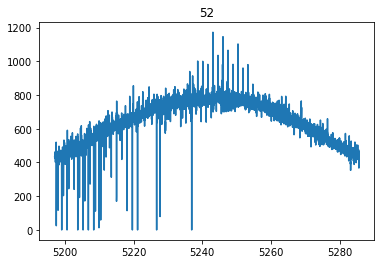

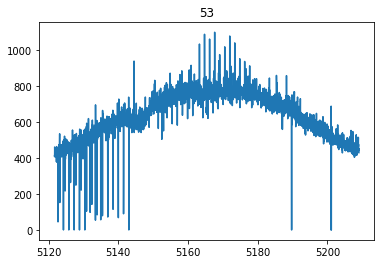

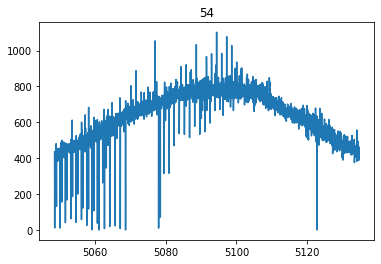

In [55]:
count = 0
for el in data:
    plt.title(count)
    plt.plot(data[count],data2[count])
    plt.show()
    count = count+1

Text(0.5, 0, 'Wavelength,A')

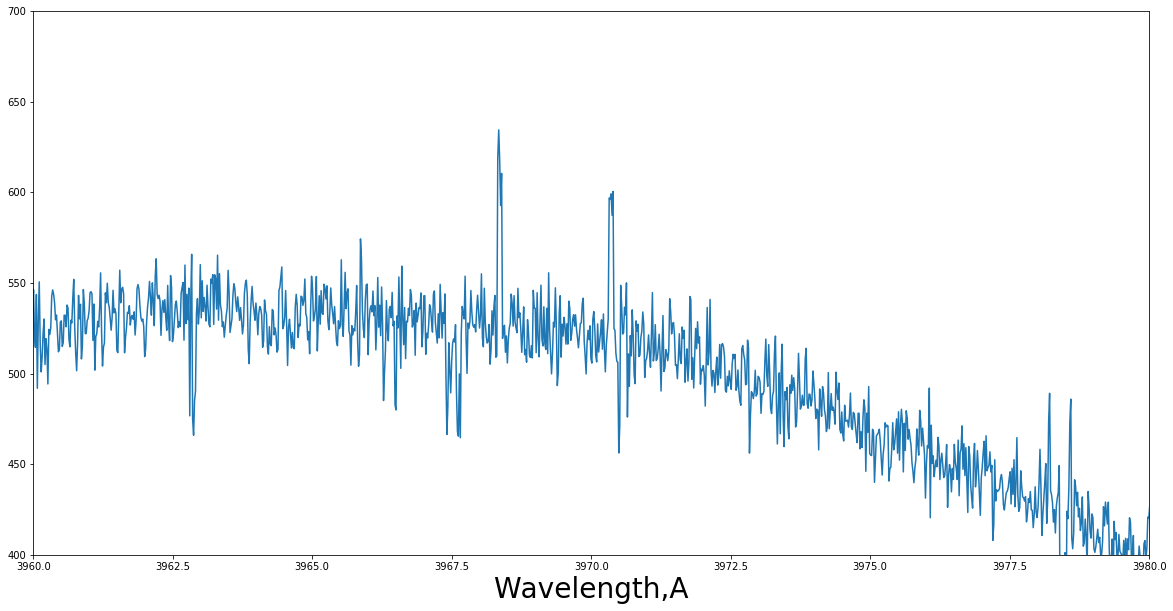

In [38]:
plt.figure(figsize=(20,10))
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
plt.plot(data[1],data2[1])
plt.xlim(3960,3980)
plt.ylim(400,700)
plt.xlabel('Wavelength,A', fontsize=28)
#plt.savefig('GD356_1.pdf')

(3960, 3980)

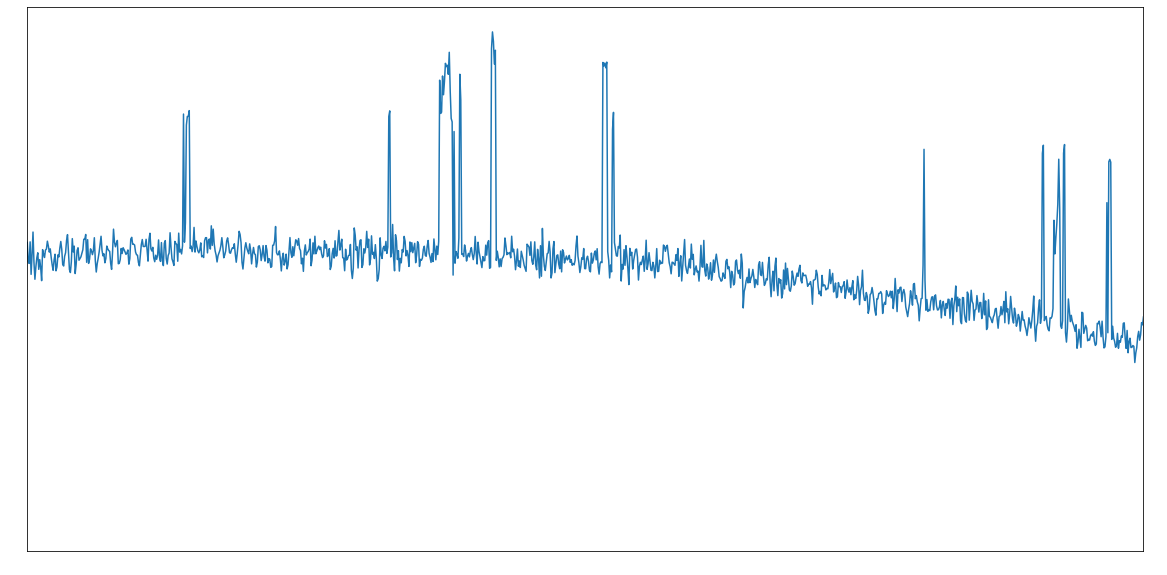

In [23]:
plt.figure(figsize=(20,10))
plt.plot(data[1],data3[1])
plt.xlim(3960,3980)
#plt.ylim(400,700)

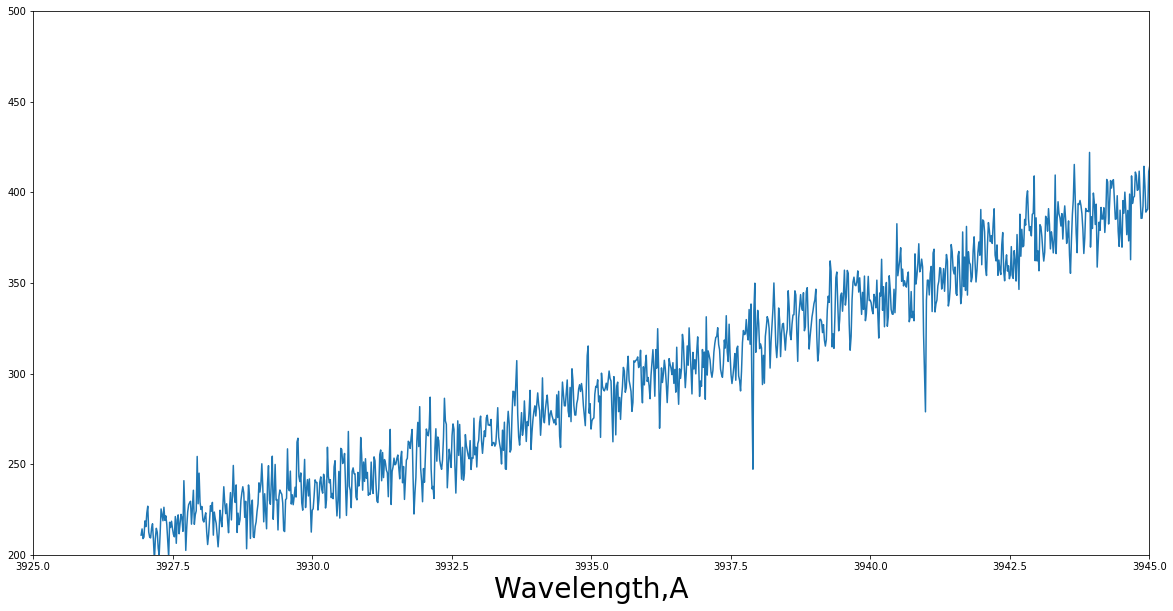

In [33]:
plt.figure(figsize=(20,10))
plt.plot(data[1],data2[1])
plt.xlim(3925,3945)
plt.ylim(200,500)

plt.xlabel('Wavelength,A', fontsize=28)
plt.savefig('GD356_2.pdf')

Text(0.5, 0, 'Wavelength,A')

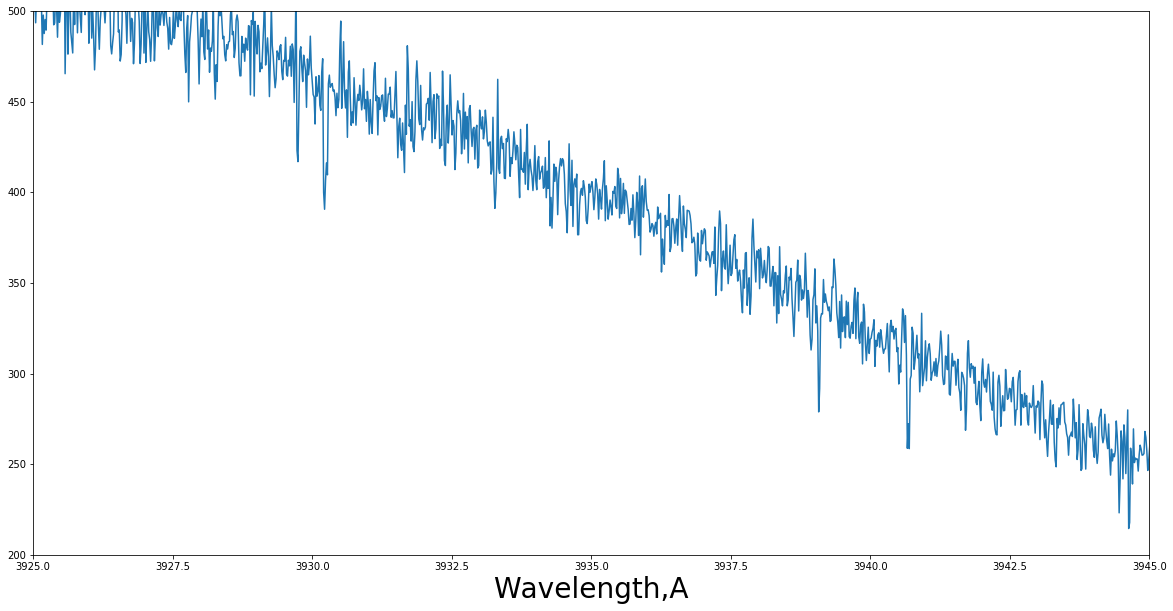

In [35]:
plt.figure(figsize=(20,10))
plt.plot(data[2],data2[2])
plt.xlim(3925,3945)
plt.ylim(200,500)


plt.xlabel('Wavelength,A', fontsize=28)
#plt.savefig('GD356_3.pdf')

<Quantity 26.14364166>

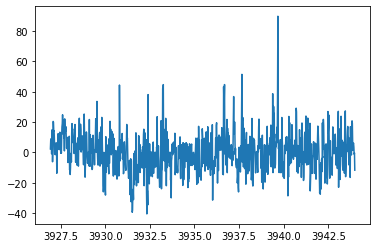

In [46]:
from specutils import Spectrum1D, SpectralRegion
from specutils.analysis import snr_derived


spectrum = Spectrum1D(spectral_axis=data[1]* u.AA, flux=data2[1]* u.Jy)
der = snr_derived(spectrum)
der


from scipy import signal
from numpy.random import default_rng

x = data2[2][:1000]
plt.plot(data[1][:1000],signal.detrend(x))
spectrum = Spectrum1D(spectral_axis=data[1][:1000]* u.AA, flux=x* u.Jy)
der = snr_derived(spectrum)
der

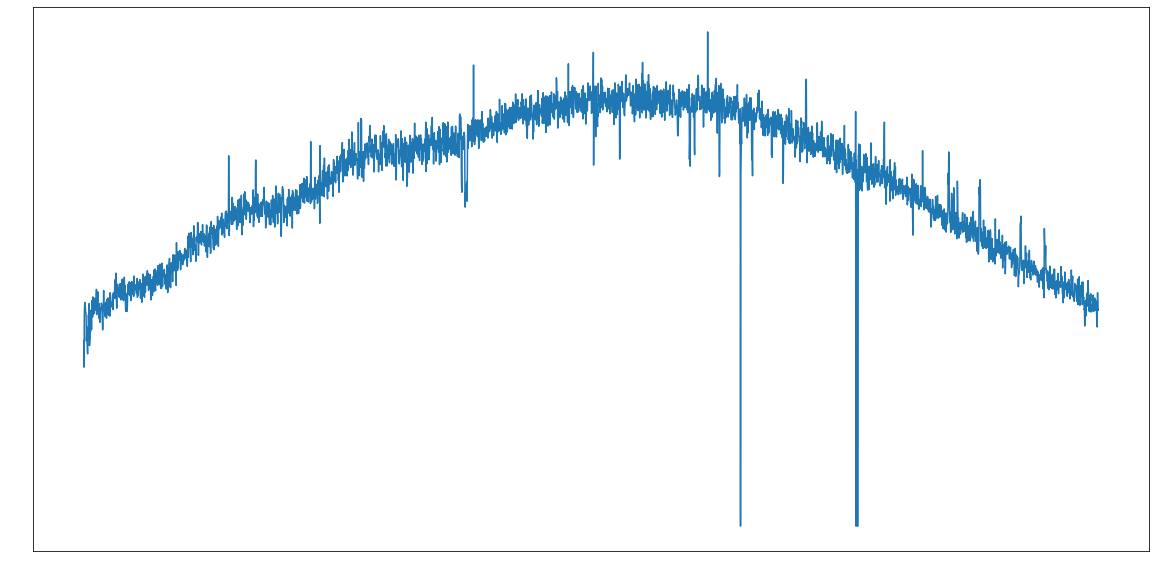

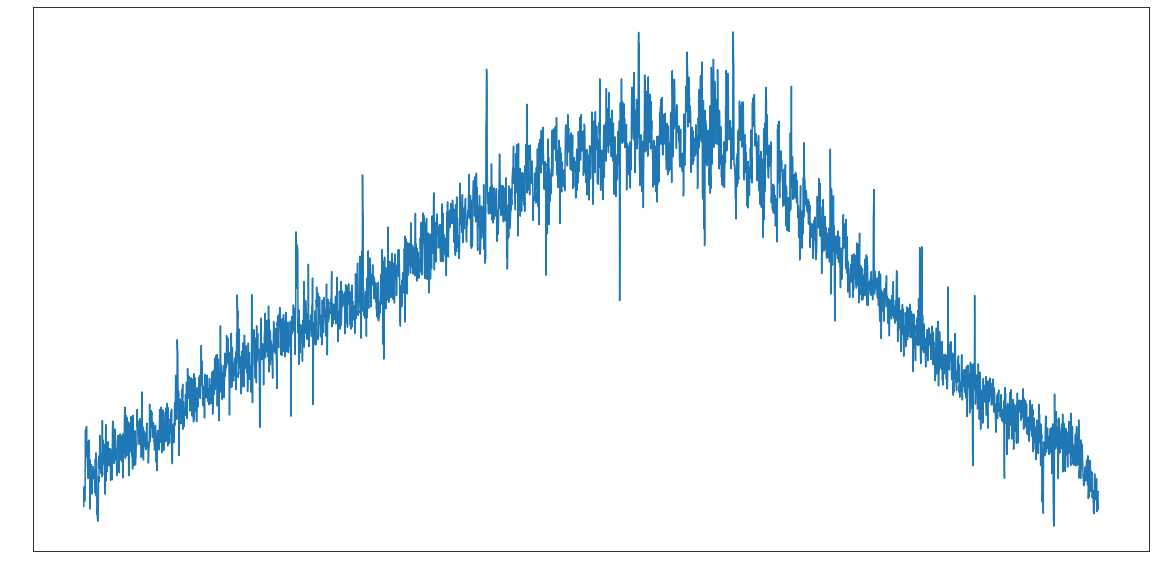

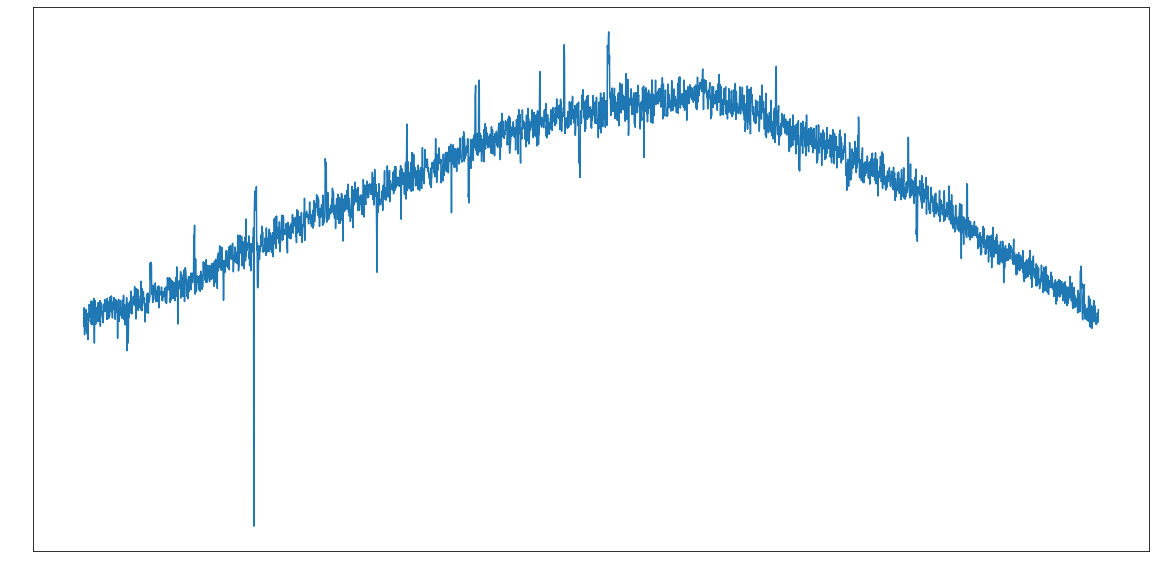

In [57]:
plt.rc('xtick',c='w')
plt.rc('ytick',c='w')

plt.figure(figsize=(20,10))
plt.plot(data[27],data2[27])
plt.show()

plt.figure(figsize=(20,10))
plt.plot(data[28],data2[28])
plt.show()

plt.figure(figsize=(20,10))
plt.plot(data[29],data2[29])
plt.show()